<a href="https://colab.research.google.com/github/s-md-ahmed/Heartdiseaseml/blob/main/mlapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Set seed for reproducibility
np.random.seed(42)

# Load the dataset
data1 = pd.read_csv("heart_disease_uci.csv")
print(data1.head())

# Drop unnecessary columns
data1.drop(['id', 'dataset'], axis=1, inplace=True)
data1.info()

# Display descriptive statistics
data1.describe()


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


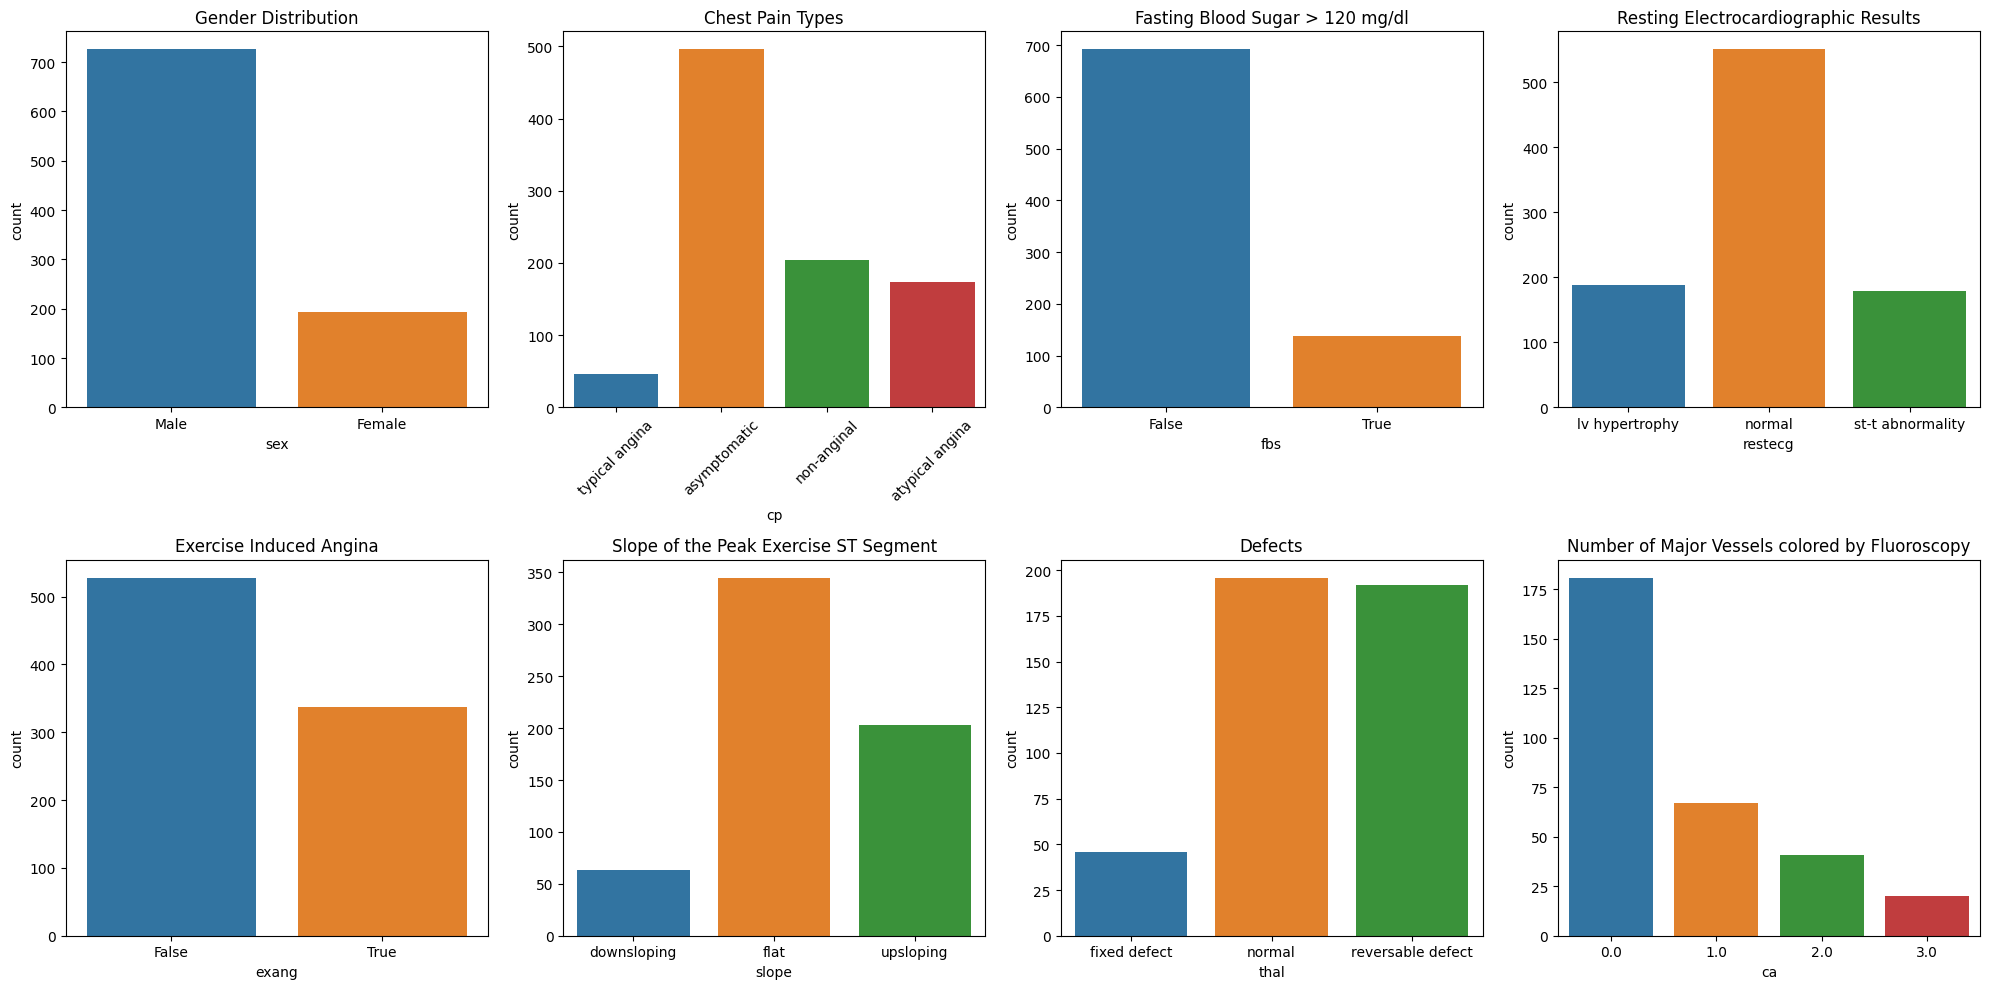

In [ ]:
# Separate numeric and categorical variables for visualization purposes
CATEGORICAL_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
NUMERICAL_COLS = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

heart_cat = data1[CATEGORICAL_COLS]
heart_num = data1[NUMERICAL_COLS]

heart_cat.nunique()

# Visualize the distribution of categorical variables
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Countplots for categorical variables
sns.countplot(x='sex', data=heart_cat, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')
sns.countplot(x='cp', data=heart_cat, ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_title('Chest Pain Types')
sns.countplot(x='fbs', data=heart_cat, ax=axes[0, 2])
axes[0, 2].set_title('Fasting Blood Sugar > 120 mg/dl')
sns.countplot(x='restecg', data=heart_cat, ax=axes[0, 3])
axes[0, 3].set_title('Resting Electrocardiographic Results')
sns.countplot(x='exang', data=heart_cat, ax=axes[1, 0])
axes[1, 0].set_title('Exercise Induced Angina')
sns.countplot(x='slope', data=heart_cat, ax=axes[1, 1])
axes[1, 1].set_title('Slope of the Peak Exercise ST Segment')
sns.countplot(x='thal', data=heart_cat, ax=axes[1, 2])
axes[1, 2].set_title('Defects')
sns.countplot(x='ca', data=heart_cat, ax=axes[1, 3])
axes[1, 3].set_title('Number of Major Vessels colored by Fluoroscopy')
plt.tight_layout()
plt.show()

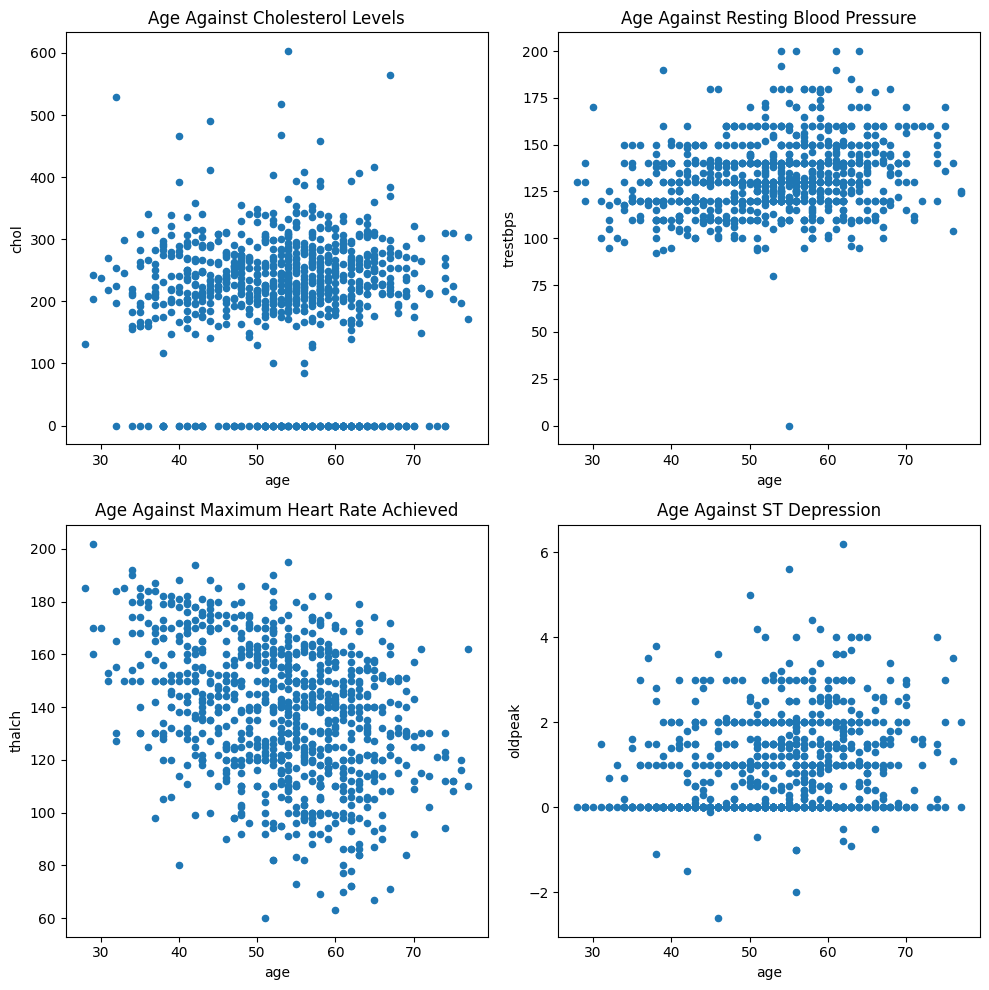

In [ ]:
# Use scatterplots to visualize key relationships in numerical data
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Scatterplots for numerical variables
heart_num.plot('age', 'chol', kind='scatter', ax=axes[0, 0])
axes[0, 0].set_title('Age Against Cholesterol Levels')
heart_num.plot('age', 'trestbps', kind='scatter', ax=axes[0, 1])
axes[0, 1].set_title('Age Against Resting Blood Pressure')
heart_num.plot('age', 'thalch', kind='scatter', ax=axes[1, 0])
axes[1, 0].set_title('Age Against Maximum Heart Rate Achieved')
heart_num.plot('age', 'oldpeak', kind='scatter', ax=axes[1, 1])
axes[1, 1].set_title('Age Against ST Depression')
plt.tight_layout()
plt.show()

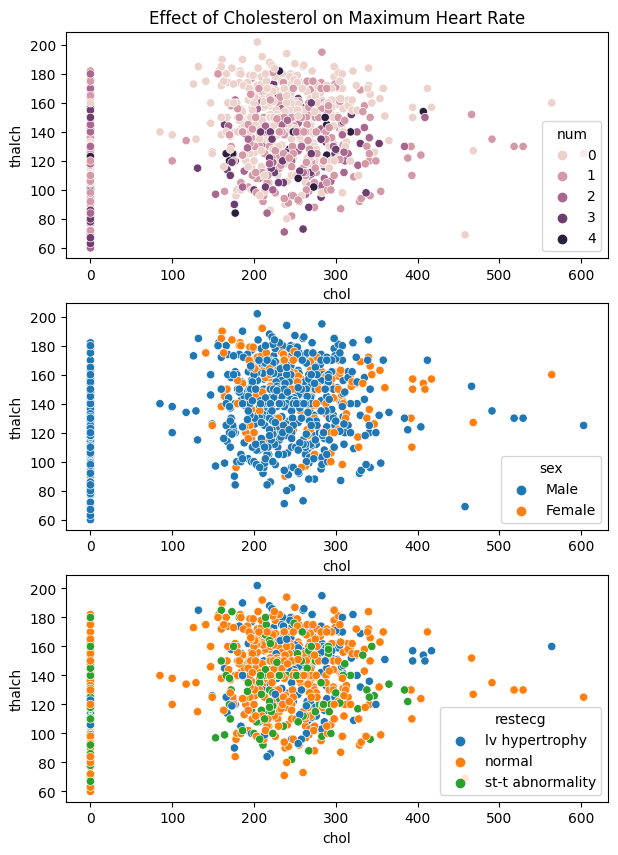

In [ ]:
# Visualize relationships using scatterplots
fig, axes = plt.subplots(3, figsize=(7, 10))

sns.scatterplot(x='chol', y='thalch', hue='num', data=data1, ax=axes[0])
axes[0].set_title('Effect of Cholesterol on Maximum Heart Rate')
sns.scatterplot(x='chol', y='thalch', hue='sex', data=data1, ax=axes[1])
sns.scatterplot(x='chol', y='thalch', hue='restecg', data=data1, ax=axes[2])
plt.show()


<ipython-input-6-4a0fc4d9e0dc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1.groupby('num').mean()
<ipython-input-6-4a0fc4d9e0dc>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data1.corr()


Average Cholesterol Level Based on Target Variable and Chest Pain Type
cp   asymptomatic  atypical angina  non-anginal  typical angina
num                                                            
0      227.843137       233.957143   222.209677      222.730769
1      193.273684       250.157895   170.756757      215.250000
2      152.321839       123.000000   118.642857       58.500000
3      157.219512       200.000000   152.888889      228.666667
4      196.478261              NaN   146.000000      231.000000
               age  trestbps      chol    thalch   oldpeak        ca       num
age       1.000000  0.244253 -0.086234 -0.365778  0.258243  0.370416  0.339596
trestbps  0.244253  1.000000  0.092853 -0.104899  0.161908  0.093705  0.122291
chol     -0.086234  0.092853  1.000000  0.236121  0.047734  0.051606 -0.231547
thalch   -0.365778 -0.104899  0.236121  1.000000 -0.151174 -0.264094 -0.366265
oldpeak   0.258243  0.161908  0.047734 -0.151174  1.000000  0.281817  0.443084
ca     

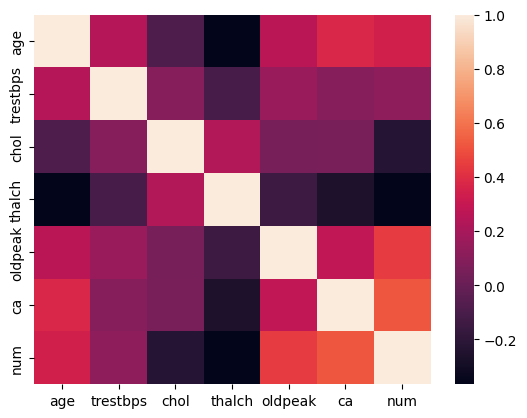

In [ ]:
# Display statistics based on the target variable
data1.groupby('num').mean()
print('Average Cholesterol Level Based on Target Variable and Chest Pain Type')
# Display cross-tabulation
print(pd.crosstab(index=data1.num, columns=data1.cp, values=data1.chol, aggfunc=np.mean))

# Display correlation matrix and heatmap
corr = data1.corr()
print(corr)

sns.heatmap(corr)
plt.show()

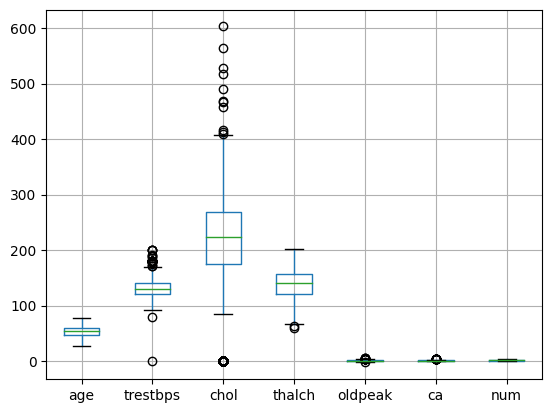

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


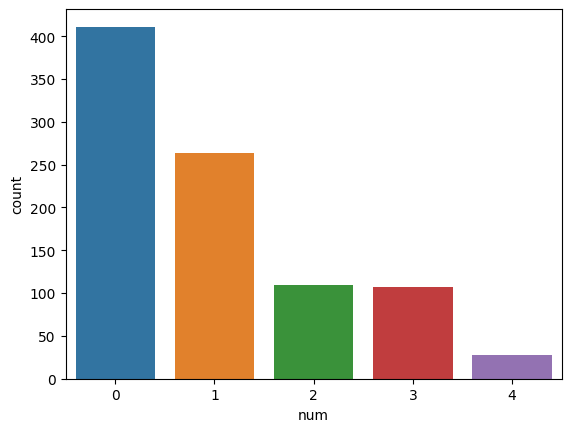

In [ ]:
# Display boxplot to visualize outliers in the data
data1.boxplot()
plt.show()

# Handling missing values and outliers
data1.loc[data1['chol'] == 0, :]
data1.info()
data1['cp'].isnull().sum()
data1['slope'].isnull().sum()

# Cholesterol Levels
median_chol = data1.loc[data1['chol'] != 0, 'chol'].median()
heart_df = data1.fillna(value={'chol': median_chol})
heart_df.loc[heart_df['chol'] == 0, 'chol'] = median_chol

# Resting Blood Pressure
mean_bp = heart_df.loc[heart_df['trestbps'] != 0, 'trestbps'].mean()
heart_df = heart_df.fillna(value={'trestbps': mean_bp})
heart_df.loc[heart_df['trestbps'] == 0, 'trestbps'] = mean_bp

# Maximum Heart Rate
mean_hr = heart_df.loc[heart_df['thalch'] != 0, 'thalch'].mean()
heart_df = heart_df.fillna(value={'thalch': mean_hr})
heart_df.loc[heart_df['thalch'] == 0, 'thalch'] = mean_hr

# Old Peak
mean_peak = heart_df.oldpeak.mean()
heart_df = heart_df.fillna(value={'oldpeak': mean_peak})
heart_df.loc[heart_df['oldpeak'] == 0, 'oldpeak'] = mean_peak
# Apply RobustScaler for handling outliers
robust_scaler = RobustScaler()
heart_df[NUMERICAL_COLS] = robust_scaler.fit_transform(heart_df[NUMERICAL_COLS])
# Feature scaling using Min-Max scaling
scaler = MinMaxScaler()
heart_df[NUMERICAL_COLS] = scaler.fit_transform(heart_df[NUMERICAL_COLS])

# Drop columns with a great number of missing values and reassign datatypes
heart_df.drop(labels=['ca', 'thal', 'slope'], axis=1, inplace=True)
heart_df = heart_df.astype({'sex': 'category', 'cp': 'category', 'fbs': 'bool', 'restecg': 'category', 'exang': 'bool'})

# Drop remaining rows with missing values and display distribution for target variables
heart_df.dropna(inplace=True)
sns.countplot(x='num', data=heart_df)
plt.show()


In [ ]:
# Splitting the data into training and testing sets
heart_onehot = pd.get_dummies(heart_df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang'])
print(heart_onehot.head())
X = heart_onehot.drop('num', axis=1)
y = heart_onehot.num
# Using SMOTE for dealing with imbalanced classes before splitting
smt = SMOTE(sampling_strategy='not majority')
X_resampled, y_resampled = smt.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check class distribution in the target variable
y_train.value_counts()


        age  trestbps      chol    thalch   oldpeak  num  sex_Female  \
0  0.714286  0.541667  0.285714  0.633803  0.556818    0           0   
1  0.795918  0.666667  0.388031  0.338028  0.465909    2           0   
2  0.795918  0.333333  0.277992  0.485915  0.590909    1           0   
3  0.183673  0.416667  0.318533  0.894366  0.693182    0           0   
4  0.265306  0.416667  0.229730  0.788732  0.454545    0           1   

   sex_Male  cp_asymptomatic  cp_atypical angina  cp_non-anginal  \
0         1                0                   0               0   
1         1                1                   0               0   
2         1                1                   0               0   
3         1                0                   0               1   
4         0                0                   1               0   

   cp_typical angina  fbs_False  fbs_True  restecg_lv hypertrophy  \
0                  1          0         1                       1   
1                  0

2    344
3    331
1    325
0    322
4    322
Name: num, dtype: int64

In [ ]:

# DecisionTreeClassifier after applying SMOTE
clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

# RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=11,max_depth=11)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.02, max_depth=3, n_estimators=150)
gradient_booster.fit(X_train, y_train)
y_pred_gb = gradient_booster.predict(X_test)

# AdaBoostClassifier
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)

# Display classification reports for all classifiers
# Random Forest
print("Random Forest Training Set Classification Report:")
print(classification_report(y_train, clf_rf.predict(X_train), zero_division=1))

print("\nRandom Forest Testing Set Classification Report:")
print(classification_report(y_test, clf_rf.predict(X_test), zero_division=1))

# Naive Bayes
print("\nNaive Bayes Training Set Classification Report:")
print(classification_report(y_train, nb_classifier.predict(X_train), zero_division=1))

print("\nNaive Bayes Testing Set Classification Report:")
print(classification_report(y_test, nb_classifier.predict(X_test), zero_division=1))

# SVM
print("\nSupport Vector Machine (SVM) Training Set Classification Report:")
print(classification_report(y_train, svm_classifier.predict(X_train), zero_division=1))

print("\nSupport Vector Machine (SVM) Testing Set Classification Report:")
print(classification_report(y_test, svm_classifier.predict(X_test), zero_division=1))

# Gradient Boosting
print("\nGradient Boosting Training Set Classification Report:")
print(classification_report(y_train, gradient_booster.predict(X_train), zero_division=1))

print("\nGradient Boosting Testing Set Classification Report:")
print(classification_report(y_test, gradient_booster.predict(X_test), zero_division=1))

# AdaBoost
print("\nAdaBoost Training Set Classification Report:")
print(classification_report(y_train, ada_classifier.predict(X_train), zero_division=1))

print("\nAdaBoost Testing Set Classification Report:")
print(classification_report(y_test, ada_classifier.predict(X_test), zero_division=1))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       322
           1       0.90      0.92      0.91       325
           2       0.92      0.94      0.93       344
           3       0.94      0.94      0.94       331
           4       0.98      0.99      0.99       322

    accuracy                           0.94      1644
   macro avg       0.95      0.94      0.95      1644
weighted avg       0.95      0.94      0.94      1644


Random Forest Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77        89
           1       0.67      0.59      0.63        86
           2       0.71      0.76      0.73        67
           3       0.68      0.71      0.70        80
           4       0.87      0.87      0.87        89

    accuracy                           0.74       411
   macro avg       0.74      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


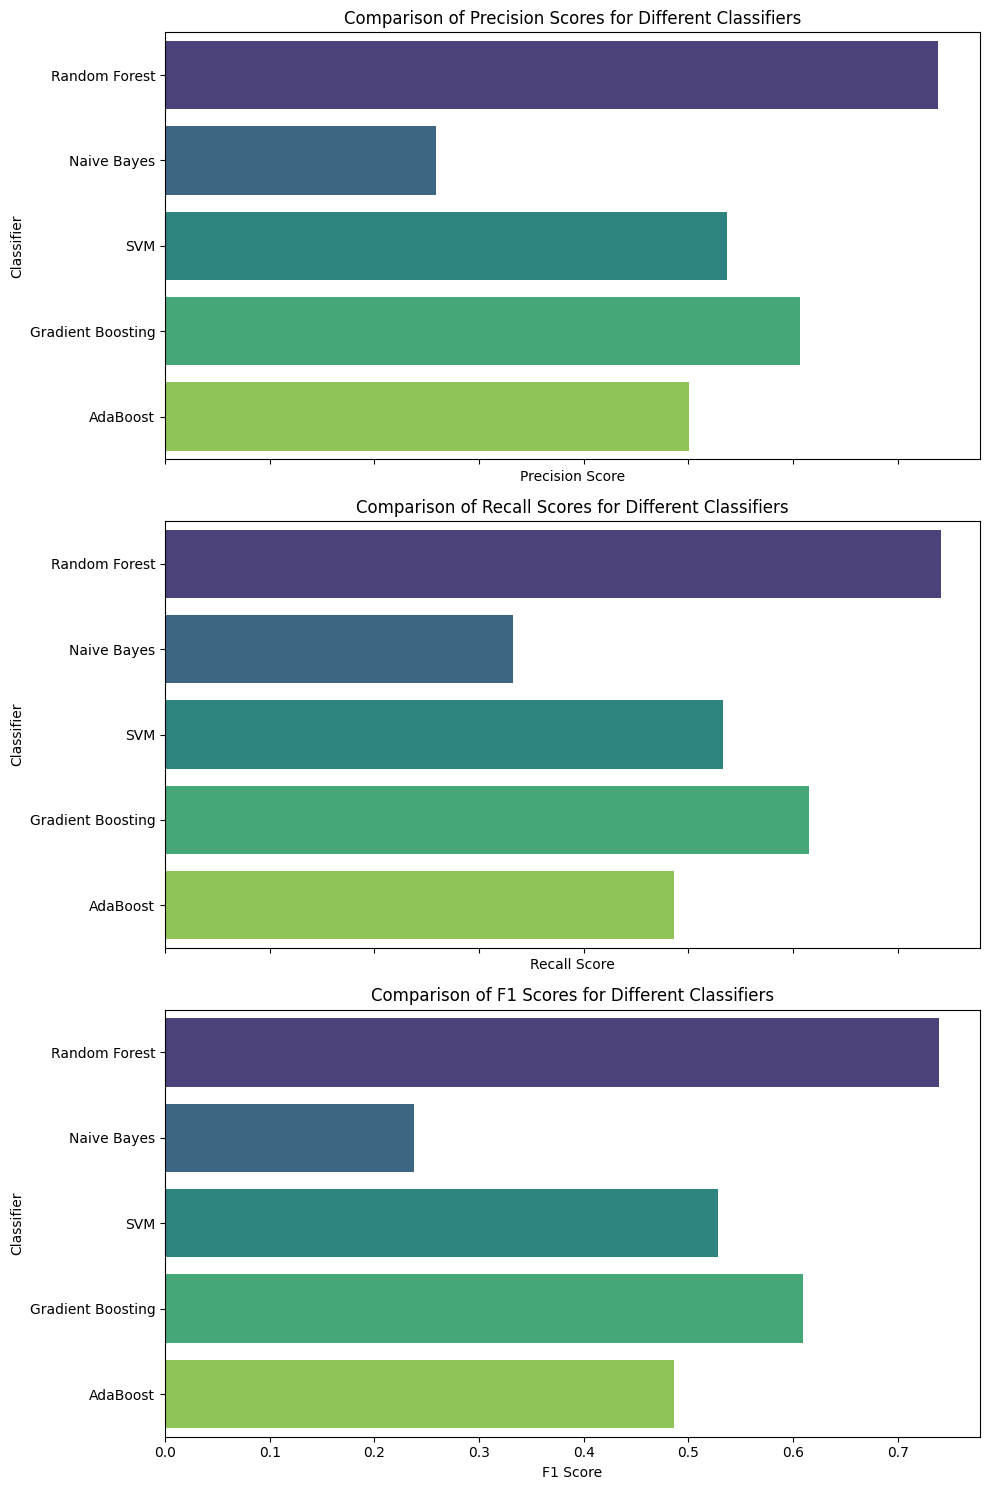

In [ ]:
# Compare F1 scores with a bar chart
classifiers = ['Random Forest', 'Naive Bayes', 'SVM', 'Gradient Boosting', 'AdaBoost']
reports = [classification_report(y_test, y_pred_rf, output_dict=True),
           classification_report(y_test, y_pred_nb, output_dict=True),
           classification_report(y_test, y_pred_svm, output_dict=True),
           classification_report(y_test, y_pred_gb, output_dict=True),
           classification_report(y_test, y_pred_ada, output_dict=True)]

# Extract precision, recall, and F1 score for each classifier
precision_scores = [report['macro avg']['precision'] for report in reports]
recall_scores = [report['macro avg']['recall'] for report in reports]
f1_scores = [report['macro avg']['f1-score'] for report in reports]

# Create a horizontal bar plot
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Precision plot
sns.barplot(x=precision_scores, y=classifiers, palette='viridis', ax=axes[0])
axes[0].set_title('Comparison of Precision Scores for Different Classifiers')
axes[0].set_xlabel('Precision Score')
axes[0].set_ylabel('Classifier')

# Recall plot
sns.barplot(x=recall_scores, y=classifiers, palette='viridis', ax=axes[1])
axes[1].set_title('Comparison of Recall Scores for Different Classifiers')
axes[1].set_xlabel('Recall Score')
axes[1].set_ylabel('Classifier')

# F1 score plot
sns.barplot(x=f1_scores, y=classifiers, palette='viridis', ax=axes[2])
axes[2].set_title('Comparison of F1 Scores for Different Classifiers')
axes[2].set_xlabel('F1 Score')
axes[2].set_ylabel('Classifier')

plt.tight_layout()
plt.show()


In [ ]:
import pickle

# Save RandomForestClassifier
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf_rf, file)

# Save MinMaxScaler
with open('min_max_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
# Save RobustScaler
with open('robust_scaler.pkl', 'wb') as file:
    pickle.dump(robust_scaler, file)
# User input for predictions
user_input = []

print("\nEnter the following details for prediction:")
for col in X.columns:
    val = input(f"{col}: ")
    user_input.append(float(val))

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input], columns=X.columns)

# Make predictions for each classifier
predictions = {
    'Random Forest': clf_rf.predict(user_df),
    #'Naive Bayes': nb_classifier.predict(user_df),
    #'SVM': svm_classifier.predict(user_df),
    #'Gradient Boosting': gradient_booster.predict(user_df),
    #'AdaBoost': ada_classifier.predict(user_df)
}

# Display predictions
print("\nPredictions:")
for classifier, prediction in predictions.items():
    print(f"{classifier}: {prediction[0]}")


Enter the following details for prediction:
age: 23
trestbps: 34
chol: 45
thalch: 234
oldpeak: 1.2
sex_Female: 1
sex_Male: 0
cp_asymptomatic: 1
cp_atypical angina: 0
cp_non-anginal: 0
cp_typical angina: 0
fbs_False: 1
fbs_True: 0
restecg_lv hypertrophy: 1
restecg_normal: 0
restecg_st-t abnormality: 0
exang_False: 0
exang_True: 1

Predictions:
Random Forest: 2
